In [1]:
%matplotlib inline

import tweepy as tw
import json
import pandas as pd
import numpy as np

from collections import defaultdict, Counter
import os
from IPython.display import clear_output

import networkx as nx


import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO
from pydotplus import graph_from_dot_data
import matplotlib.image as mpimg

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
DATA_DIR="../data"
TWITTER_CONFIG_FILE=os.path.join(DATA_DIR, "twitter_config.json")

## Twitter Access Tokens

If you are proceeding further then you are expected to have created your Twitter application by following the steps from [Twitter App Creation](https://dev.twitter.com/oauth/overview/application-owner-access-tokens) page. 

Make sure you have the following details of your Twitter application readily available:
* 'access_token'
* 'access_token_secret'
* 'consumer_key'
* 'consumer_secret'

Please enter the value of each of the items as shown in your Twitter application, when prompted by the code below.


In [4]:
if not os.path.isfile(TWITTER_CONFIG_FILE):
    with open(os.path.join(DATA_DIR, "twitter_config.sample.json")) as fp:
        creds = json.load(fp)
        for k in sorted(creds.keys()):
            v = input("Enter %s:\t" % k)
            creds[k] = v
    print(creds)
    with open(TWITTER_CONFIG_FILE, "w+") as fp:
        json.dump(creds, fp, indent=4, sort_keys=True)
    clear_output()
    print("Printed credentials to file %s" % TWITTER_CONFIG_FILE)

In [5]:
with open(TWITTER_CONFIG_FILE) as fp:
    creds = json.load(fp)
print(creds.keys())

dict_keys(['access_token', 'access_token_secret', 'consumer_key', 'consumer_secret'])


In [6]:
auth = tw.OAuthHandler(creds["consumer_key"], creds["consumer_secret"])
auth.set_access_token(creds["access_token"], creds["access_token_secret"])
api = tw.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,
             retry_count=5, retry_delay=100, 
            )

print("Tweepy ready for search")

Tweepy ready for search


In [7]:
statuses = api.search(q=input("What is your search term?"), count=10)

What is your search term?China


In [8]:
len(statuses)

8

In [9]:
for status in statuses:
    print(status.text)

RT @jeetensingh: Lol #Presstitutes derives &amp; co-operate a new agenda .These are paid by China at the RaGa's lovingly dates with the Chinese…
@gauravcsawant @PMOIndia #China better should have balls to curb on Islamic kinda of nationalism(terrorism) and jih… https://t.co/rUQ8yDbcOU
RT @ChelseaFC: A reminder of the 25 players we have taken to China for the #CFCTour...

https://t.co/am0dk5ge72
RT @adambedders: If you're under 40 and farming you ought to be interested in this - get yourself to China! @NFYFC https://t.co/B2R8QJ1JgX
RT @MiddleEastEye: China reaffirms commitment to Palestinian state https://t.co/42ceUZp01f
RT @HarishK04131926: This is How Pakistani News Channels and Twitter Handles Spreading Lies About Indo-China War https://t.co/6o72AiOjpO vi…
Me gustó un video de @YouTube https://t.co/COJZ4XhMAV PROBANDOME MÁS ROPA CHINA | Uy Albert!
China destaca el “significativo progreso” llevado a cabo por Pekín y Washington en materia comercial https://t.co/fhL8euSUxZ


In [10]:
def dict2df(data):
    return pd.DataFrame(
        list(data.items()),
        columns=["item", "counts"]
    ).sort_values("counts", ascending=False)

def get_entities(statuses):
    hashtags = defaultdict(int)
    mentions = defaultdict(int)
    keys = ("hashtags", "user_mentions")
    for s in statuses:
        entities = s.entities
        if "hashtags" in entities:
            e = map(lambda x: x["text"], entities["hashtags"])
            for t in e:
                hashtags[t] += 1
        if "user_mentions" in entities:
            e = map(lambda x: x["screen_name"], entities["user_mentions"])
            for t in e:
                mentions[t] += 1
    return dict2df(hashtags), dict2df(mentions)

In [11]:
hashtags, mentions = get_entities(statuses)

In [12]:
len(statuses)

8

In [13]:
hashtags

,item,counts
0,Presstitutes,1
1,China,1
2,CFCTour,1


In [14]:
mentions

,item,counts
0,jeetensingh,1
1,gauravcsawant,1
2,PMOIndia,1
3,ChelseaFC,1
4,adambedders,1
5,NFYFC,1
6,MiddleEastEye,1
7,HarishK04131926,1
8,YouTube,1


## Current user's information

In [15]:
current_user = api.me()
current_user

User(_api=<tweepy.api.API object at 0x7f28ae7b8588>, _json={'id': 16621479, 'id_str': '16621479', 'name': 'Shubhanshu Mishra', 'screen_name': 'TheShubhanshu', 'location': 'Urbana, Illinois, USA', 'profile_location': None, 'description': 'PhD Student at @GSLIS @UIUC using data mining and ML. All my tweets can be used for data mining. I created ReadLater for Chrome https://t.co/rDKLiPfswZ', 'url': 'https://t.co/WfIGt6oMtT', 'entities': {'url': {'urls': [{'url': 'https://t.co/WfIGt6oMtT', 'expanded_url': 'http://shubhanshu.com', 'display_url': 'shubhanshu.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/rDKLiPfswZ', 'expanded_url': 'http://goo.gl/AxnrBG', 'display_url': 'goo.gl/AxnrBG', 'indices': [128, 151]}]}}, 'protected': False, 'followers_count': 657, 'friends_count': 615, 'listed_count': 71, 'created_at': 'Mon Oct 06 22:27:27 +0000 2008', 'favourites_count': 95, 'utc_offset': -21600, 'time_zone': 'Central America', 'geo_enabled': True, 'verified': False, '

In [16]:
status

Status(_api=<tweepy.api.API object at 0x7f28ae7b8588>, _json={'created_at': 'Thu Jul 20 05:09:42 +0000 2017', 'id': 887902313796513792, 'id_str': '887902313796513792', 'text': 'China destaca el “significativo progreso” llevado a cabo por Pekín y Washington en materia comercial https://t.co/fhL8euSUxZ', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/fhL8euSUxZ', 'expanded_url': 'http://www.europapress.es/internacional/noticia-china-destaca-significativo-progreso-llevado-cabo-pekin-washington-materia-comercial-20170720053314.html?btz45=0509074220', 'display_url': 'europapress.es/internacional/…', 'indices': [101, 124]}]}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://www.botize.com" rel="nofollow">Botize</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user

In [17]:
print(
"""Username: {}
Full Name: {}
# Followers: {}
# Friends: {}
# Statuses: {}""".format(
        current_user.screen_name,
        current_user.name,
        current_user.followers_count,
        current_user.friends_count,
        current_user.statuses_count
    )
)

Username: TheShubhanshu
Full Name: Shubhanshu Mishra
# Followers: 657
# Friends: 615
# Statuses: 3918


## Friends API

In [18]:
friends = []
for friend in tw.Cursor(api.friends, count=100).items():
    friends.append(friend)
print("{} friends found for {}".format(len(friends), current_user.name))

617 friends found for Shubhanshu Mishra


In [19]:
df_friends = pd.DataFrame(
    list(map(
        lambda k: (k.id, k.name, k.friends_count, k.followers_count, k.statuses_count),
        friends
    )), columns=["id", "name", "friends", "followers", "statuses"]
).sort_values("followers", ascending=False).reset_index(drop=True)
df_friends.head(15)

,id,name,friends,followers,statuses
0,813286,Barack Obama,628994,92017544,15451
1,50393960,Bill Gates,183,36274382,2424
2,88856792,Aamir Khan,9,21429541,475
3,822215679726100480,President Trump,42,19421468,904
4,20536157,Google,205,18432652,73365
5,71201743,Virat Kohli,45,16535365,1175
6,1536791610,President Obama,79,15389729,352
7,44196397,Elon Musk,42,10330297,3275
8,15492359,TED Talks,514,10175236,22977
9,19725644,Neil deGrasse Tyson,41,8067857,5453


In [20]:
network = np.zeros([df_friends.shape[0], df_friends.shape[0]])
network.shape

(617, 617)

In [21]:
def get_friendship(id1, id2, verbose=False):
    response = api.show_friendship(source_id=id1, target_id=id2)
    if verbose:
        print(response)
    return response[0].following, response[1].following
    

In [22]:
get_friendship(df_friends["id"].values[0], df_friends["id"].values[1], verbose=True)

(Friendship(_api=<tweepy.api.API object at 0x7f28ae7b8588>, id=813286, id_str='813286', screen_name='BarackObama', following=False, followed_by=True, live_following=False, following_received=None, following_requested=None, notifications_enabled=None, can_dm=True, blocking=None, blocked_by=None, muting=None, want_retweets=None, all_replies=None, marked_spam=None), Friendship(_api=<tweepy.api.API object at 0x7f28ae7b8588>, id=50393960, id_str='50393960', screen_name='BillGates', following=True, followed_by=False, following_received=None, following_requested=None))


(False, True)

In [23]:
network[0, 0] = False
network[1, 0] = True
network[0:3, 0]

array([ 0.,  1.,  0.])

In [24]:
def generate_ego_network(df_friends):
    network = np.zeros([df_friends.shape[0], df_friends.shape[0]])
    processed_friendships=0
    for i, fid1 in enumerate(df_friends["id"].values):
        for j, fid2 in enumerate(df_friends["id"].values[i+1:], start=i+1):
            try:
                tie_labels = get_friendship(fid1, fid2)
                processed_friendships += 1
            except:
                print("Processed friendships = {}".format(processed_friendships))
                print("Error occurred")
                return network
            network[i, j] = tie_labels[0]
            network[j, i] = tie_labels[1]
    return network

In [25]:
df_friends.tail()

,id,name,friends,followers,statuses
612,709866998604419072,ICSS2016,15,19,28
613,217524967,Shubhanshu Mishra,3,12,382
614,862776294441984000,Christopher De Sa,8,11,1
615,4330080442,Sudhanshu Mishra,21,1,0
616,492698838,LiveLifeLikeAJive,9,1,0


## Generate user mention network

In [26]:
statuses = [status for status in tw.Cursor(
    api.search, q=input("What is your search term?"), count=1000).items(1000)]

What is your search term?Data Mining


In [27]:
len(statuses)

1000

In [28]:
status = next(filter(lambda x: len(x.entities["hashtags"]), statuses))

In [29]:
status.entities

{'hashtags': [{'indices': [7, 15], 'text': 'Twitter'},
  {'indices': [26, 33], 'text': 'Python'}],
 'symbols': [],
 'urls': [{'display_url': 'kdnuggets.com/2016/07/mining…',
   'expanded_url': 'http://www.kdnuggets.com/2016/07/mining-twitter-data-python-part-7.html#.WXA5UpRC9nI.twitter',
   'indices': [75, 98],
   'url': 'https://t.co/sQ3xXylp2y'}],
 'user_mentions': []}

In [30]:
def get_entities(statuses, entity_type, text_property):
    entity_counts = defaultdict(int)
    entity_network = defaultdict(int)
    for status in statuses:
        for i, entity in enumerate(status.entities[entity_type]):
            entity_counts[entity[text_property].lower()] += 1
            for j, entity_2 in enumerate(status.entities[entity_type][i+1:], start=i+1):
                entity_network[(
                    entity[text_property].lower(),
                    entity_2[text_property].lower()
                )] += 1
    return entity_counts, entity_network

In [31]:
entity_type="user_mentions"
text_property="screen_name"
entity_counts, entity_network = get_entities(statuses, entity_type, text_property)

In [32]:
df_entities = pd.DataFrame(list(entity_counts.items()),
                           columns=["entity", "counts"]).sort_values(
    "counts", ascending=False
).reset_index(drop=True)
df_entities.head()

,entity,counts
0,pokemongohubnet,73
1,youtube,42
2,gp_pulipaka,40
3,ronald_vanloon,34
4,billmaher,29


In [33]:
df_entities.head(20)

,entity,counts
0,pokemongohubnet,73
1,youtube,42
2,gp_pulipaka,40
3,ronald_vanloon,34
4,billmaher,29
5,nikhilmkss,24
6,msnbc,23
7,kylegriffin1,22
8,hitanalytics,17
9,tmarzagao,16


In [34]:
df_entity_pairs = pd.DataFrame([(k1, k2, v) for (k1,k2), v in entity_network.items()],
                           columns=[
                               "{}_1".format(entity_type),
                               "{}_2".format(entity_type),
                               "counts"]).sort_values(
    "counts", ascending=False
).reset_index(drop=True)
df_entity_pairs.head()

,user_mentions_1,user_mentions_2,counts
0,kylegriffin1,msnbc,22
1,ittes2017,sonerhoca,11
2,ittes2017,tolgaguyer,11
3,jstines3,potus,11
4,dbaker007,datasciencectrl,8


In [35]:
df_entity_pairs.head(20)

,user_mentions_1,user_mentions_2,counts
0,kylegriffin1,msnbc,22
1,ittes2017,sonerhoca,11
2,ittes2017,tolgaguyer,11
3,jstines3,potus,11
4,dbaker007,datasciencectrl,8
5,sonerhoca,tolgaguyer,6
6,ittes2017,ittes2017,5
7,salsaprice,billmaher,4
8,openupsa,rox_jos,4
9,ipfconline1,gp_pulipaka,4


## Plot network

In [36]:
G = nx.Graph()

In [37]:
G.add_nodes_from(entity_counts)

In [38]:
G.add_edges_from([
    (k[0], k[1], {"weight": v})
    for k, v in entity_network.items()
])

(-0.10167285826047012,
 1.1019029321484448,
 -0.097910076231053481,
 1.0946683307075713)

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


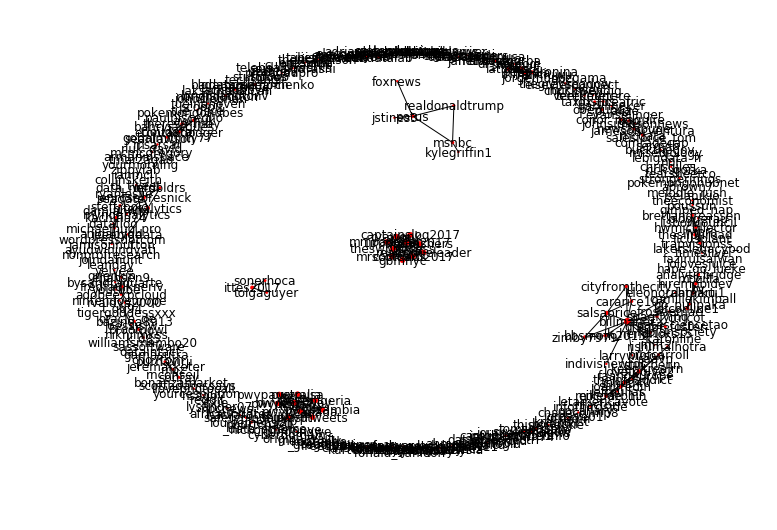

In [39]:
fig, ax = plt.subplots(1,1)
nx.draw_networkx(
    G, with_labels=True,
    node_size=[x[1]*3 for x in G.degree_iter()],
    pos=nx.spring_layout(G),
    ax=ax
)
ax.axis("off")

In [40]:
connected_components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("{} connected components found.".format(len(connected_components)))

192 connected components found.


(-0.10354350610649285, 1.0896721356921388, -0.10500000000000001, 1.105)

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


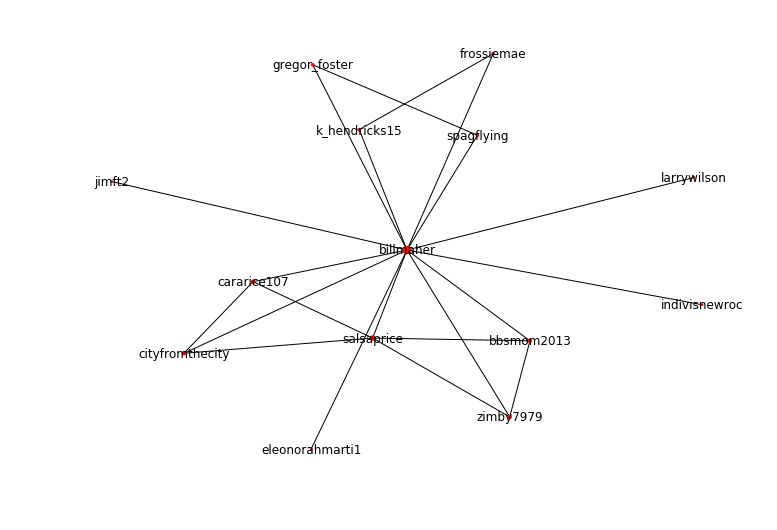

In [41]:
fig, ax = plt.subplots(1,1)
nx.draw_networkx(
    connected_components[0], with_labels=True,
    node_size=[x[1]*5 for x in connected_components[0].degree_iter()],
    pos=nx.spring_layout(connected_components[0]),
    ax=ax
)
ax.axis("off")

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


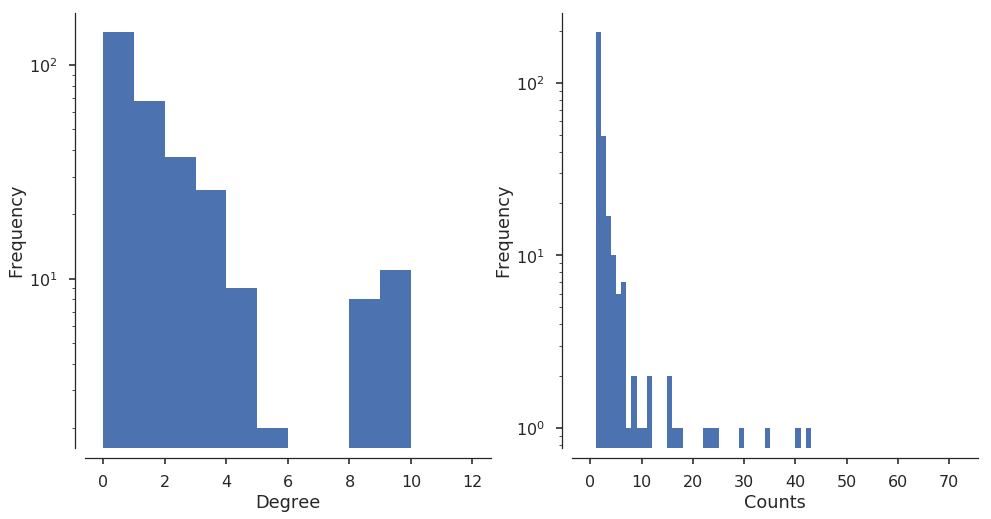

In [42]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].hist(list(G.degree().values()), bins=list(range(max(G.degree().values()))), log=True)
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Frequency")

ax[1].hist(list(entity_counts.values()), bins=list(range(max(entity_counts.values()))), log=True)
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Frequency")
sns.despine(offset=10)

### Why are the graphs different?
Concept of weights